In [128]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [129]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [130]:
dir='C:\\Users\\ab31s\\OneDrive\\Desktop\\ecommerce_olist_project\\data'
for filename in os.listdir(dir):
  print(filename)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [131]:
customers_df=pd.read_csv(f'{dir}/olist_customers_dataset.csv')
geolocation_df=pd.read_csv(f'{dir}/olist_geolocation_dataset.csv')
products_df=pd.read_csv(f'{dir}/olist_products_dataset.csv')
categories_df=pd.read_csv(f'{dir}/product_category_name_translation.csv')
payments_df=pd.read_csv(f'{dir}/olist_order_payments_dataset.csv')
orders_df=pd.read_csv(f'{dir}/olist_orders_dataset.csv')
reviews_df=pd.read_csv(f'{dir}/olist_order_reviews_dataset.csv')
sellers_df=pd.read_csv(f'{dir}/olist_sellers_dataset.csv')
items_df=pd.read_csv(f'{dir}/olist_order_items_dataset.csv')

In [132]:
merged_df=pd.merge(customers_df,orders_df,on='customer_id',how='left')
merged_df=pd.merge(merged_df,payments_df,on='order_id',how='left')
merged_df=pd.merge(merged_df,reviews_df,on='order_id',how='left')
merged_df=pd.merge(merged_df,items_df,on='order_id',how='left')
merged_df=pd.merge(merged_df,products_df,on='product_id',how='left')
merged_df=pd.merge(merged_df,sellers_df,on='seller_id',how='left')

In [133]:
merged_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [134]:
merged_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC


## Data Cleaning

In [135]:
merged_df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833


In [136]:
merged_df['product_volume_cm3']=merged_df['product_height_cm']*merged_df['product_width_cm']*merged_df['product_length_cm']

In [137]:
new_df=merged_df.drop(['review_comment_title',
                       'review_comment_message',
                       'product_length_cm',
                       'product_height_cm',
                       'product_width_cm',
                       'customer_zip_code_prefix',
                       'seller_zip_code_prefix'
                       ],axis=1)
new_df.head(2)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,product_volume_cm3
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,itaquaquecetuba,SP,107136.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,itajai,SC,53400.0


In [138]:
new_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'seller_city', 'seller_state', 'product_volume_cm3'],
      dtype='object')

Formating Time Columns

In [139]:
time_cols=['order_purchase_timestamp',
           'order_approved_at',
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date',
           'review_creation_date',
           'review_answer_timestamp',
           'shipping_limit_date']

In [140]:
for col in time_cols:
  new_df[col]=pd.to_datetime(new_df[col])

In [141]:
new_df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           float64
product_id                              

In [142]:
new_df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_creation_date              997
review_answer_timestamp           997
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2542
product_name

In [143]:
new_df[new_df.isna().any(axis=1)]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,product_volume_cm3
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,...,19.90,16.11,NaN,NaN,NaN,NaN,250.0,sao paulo,SP,2400.0
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,...,89.90,12.13,cama_mesa_banho,54.0,245.0,1.0,1383.0,ibitinga,SP,20000.0
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,...,89.90,12.13,cama_mesa_banho,54.0,245.0,1.0,1383.0,ibitinga,SP,20000.0
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,...,129.90,13.35,consoles_games,56.0,586.0,2.0,300.0,aruja,SP,4950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118971,c9eb9435ff687d924d0ea1741bd1a5a6,0d5cc93aefe2e66255f969fdd179c8b5,nova lima,MG,80ef3cee33c2462dc72f8938e980a03e,delivered,2018-06-23 21:46:52,2018-06-23 22:18:32,2018-06-28 11:22:00,2018-07-05 13:15:48,...,19.95,16.33,livros_interesse_geral,26.0,2857.0,1.0,500.0,sao paulo,SP,6600.0
118994,10f6413b5b1071b6b46c72c05df6f4d6,baefaec72794d54a0aeaf7bb6203704b,santa barbara d'oeste,SP,1f169866113310fa8ab239a0b4c7e8de,delivered,2018-04-17 13:25:52,2018-04-18 06:32:05,2018-04-18 22:08:33,2018-04-24 20:47:39,...,39.90,15.23,fashion_bolsas_e_acessorios,51.0,372.0,2.0,150.0,sete lagoas,MG,1584.0
119001,58d54b1ff5f21bb5fe6928646949ff4c,8adff52976579b096284ce43e65d6160,duque de caxias,RJ,5f95f5f78f509a3af5a6c83d81c1117f,delivered,2017-08-06 13:38:15,2017-08-08 04:40:20,2017-08-14 12:47:34,2017-08-23 20:18:04,...,52.80,15.12,NaN,NaN,NaN,NaN,800.0,sorocaba,SP,7337.0
119026,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaT,...,526.00,28.96,relogios_presentes,50.0,666.0,1.0,700.0,registro,SP,3380.0


In [144]:
new_df.dropna(inplace=True)

In [145]:
new_df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty  

In [146]:
# removing whitespaces
new_df[' customer_city']=new_df['customer_city'].str.strip().str.title()

In [147]:
new_df['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [148]:
new_df['payment_sequential'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  6., 10.,  8., 11.,  7.,  9., 12., 17.,
       13., 16., 15., 14., 18., 19., 21., 20., 22., 26., 25., 24., 23.])

In [149]:
new_df['payment_sequential']=new_df['payment_sequential'].astype(int)

In [150]:
new_df['payment_type'].unique()

array(['credit_card', 'debit_card', 'boleto', 'voucher'], dtype=object)

In [151]:
new_df['payment_installments'].unique()

array([ 2.,  8.,  7.,  1.,  3., 10.,  5.,  6.,  4., 12.,  9., 18., 16.,
       15., 13., 24., 22., 21., 20., 14.,  0., 17., 11., 23.])

In [152]:
new_df['payment_installments']=new_df['payment_installments'].astype(int)

In [153]:
new_df['payment_value'].unique()

array([146.87, 335.48, 157.73, ...,  86.49,  92.36, 167.79],
      shape=(28277,))

In [154]:
new_df['payment_value'].describe()

count    113216.000000
mean        171.577925
std         264.218677
min           0.000000
25%          60.850000
50%         107.970000
75%         189.160000
max       13664.080000
Name: payment_value, dtype: float64

In [155]:
new_df['delivery_delay'] = (new_df['order_delivered_customer_date'] - new_df['order_estimated_delivery_date']).dt.days
new_df['days_to_deliver'] = (new_df['order_delivered_customer_date'] - new_df['order_purchase_timestamp']).dt.days
new_df['is_late'] = new_df['delivery_delay'].apply(lambda x: 1 if x > 0 else 0)['delivery_delay'] = (new_df['order_delivered_customer_date'] - new_df['order_estimated_delivery_date']).dt.days
new_df['days_to_deliver'] = (new_df['order_delivered_customer_date'] - new_df['order_purchase_timestamp']).dt.days
new_df['is_late'] = new_df['delivery_delay'].apply(lambda x: 1 if x > 0 else 0)

In [156]:
new_df['is_late'].unique()

array([0, 1])

<Axes: ylabel='payment_value'>

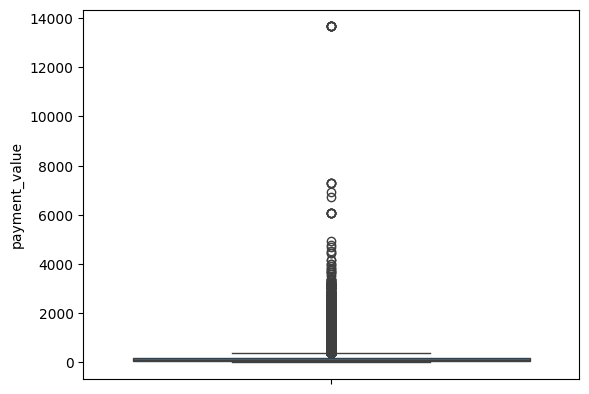

In [157]:
sns.boxplot(new_df['payment_value'])

In [158]:
new_df['review_score'].unique()

array([4., 5., 3., 1., 2.])

In [159]:
new_df['review_score']=new_df['review_score'].astype(int)

Text(0.5, 1.0, 'Olist Reviews')

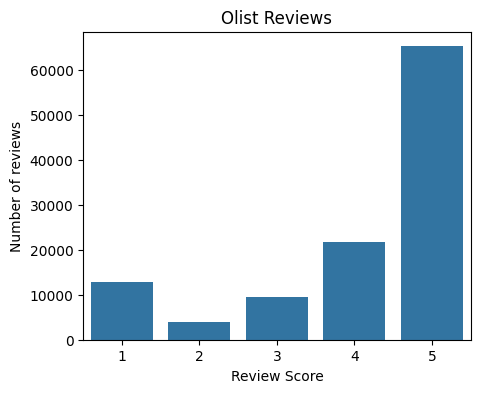

In [160]:
score_count=pd.DataFrame(new_df['review_score'].value_counts())

score_count = score_count.reset_index()
score_count.columns = ['review_score', 'count']

plt.figure(figsize=(5,4))
sns.barplot(score_count,x='review_score',y='count')
plt.ylabel('Number of reviews')
plt.xlabel('Review Score')
plt.title('Olist Reviews')

C:\Users\ab31s\AppData\Local\Temp\ipykernel_19108\3598626721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='mako')


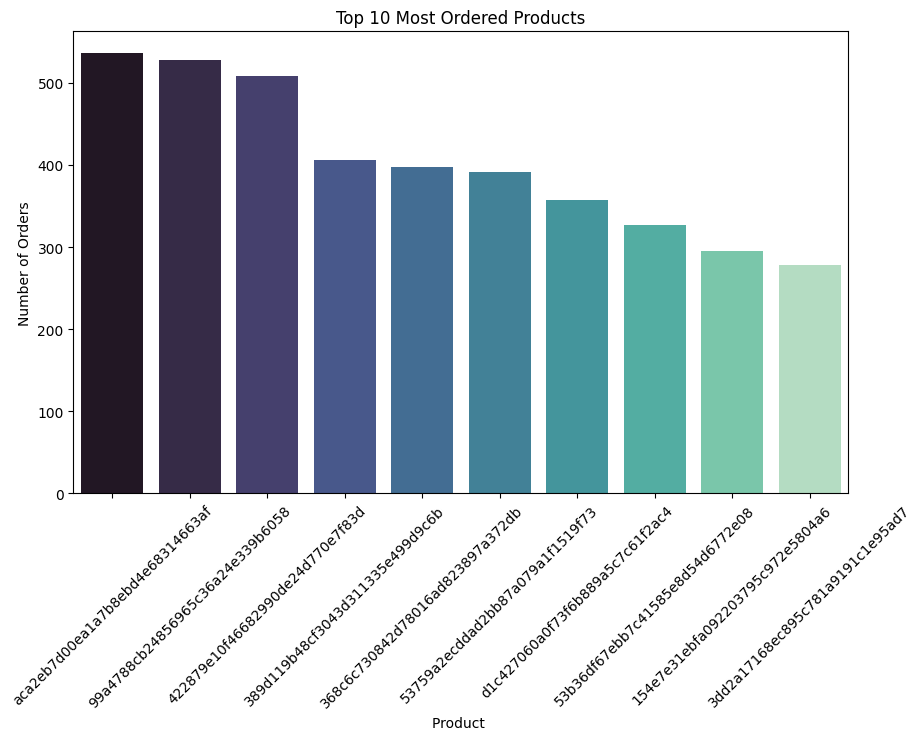

In [161]:
top_10 = merged_df['product_id'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10.index, y=top_10.values, palette='mako')
plt.title("Top 10 Most Ordered Products")
plt.ylabel("Number of Orders")
plt.xlabel("Product ")
plt.xticks(rotation=45)
plt.show()


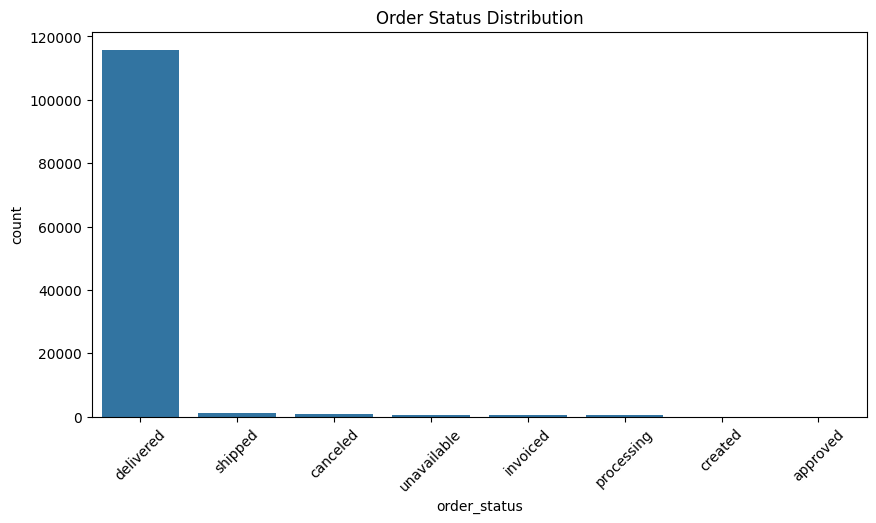

In [162]:
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x="order_status", order=merged_df["order_status"].value_counts().index)
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.show()


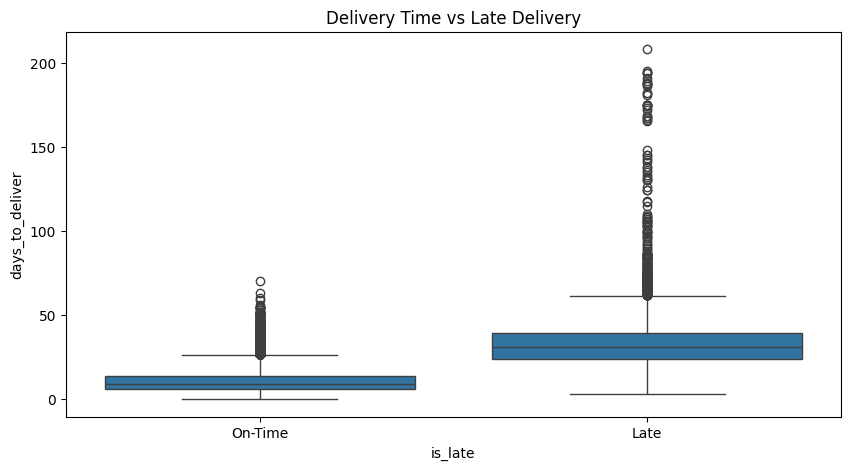

In [163]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df, x="is_late", y="days_to_deliver")
plt.title("Delivery Time vs Late Delivery")
plt.xticks([0, 1], ['On-Time', 'Late'])
plt.show()

In [164]:
new_df['price'].describe()

count    113216.000000
mean        119.869740
std         181.127416
min           0.850000
25%          39.900000
50%          74.900000
75%         132.985000
max        6735.000000
Name: price, dtype: float64

In [165]:
new_df['freight_value'].describe()

count    113216.000000
mean         20.002353
std          15.710909
min           0.000000
25%          13.080000
50%          16.320000
75%          21.190000
max         409.680000
Name: freight_value, dtype: float64

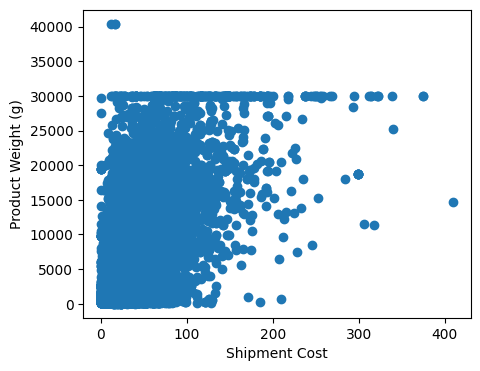

In [166]:
plt.figure(figsize=(5,4))
plt.scatter(new_df['freight_value'],new_df['product_weight_g'])
plt.xlabel('Shipment Cost')
plt.ylabel('Product Weight (g)')
plt.show()

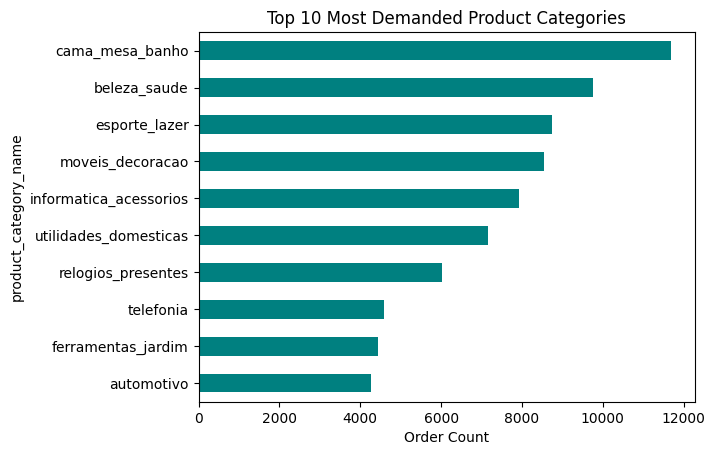

In [167]:
# Top Categories
top_categories = new_df['product_category_name'].value_counts().head(10)
top_categories.plot(kind='barh', color='teal')
plt.title('Top 10 Most Demanded Product Categories')
plt.xlabel('Order Count')
plt.gca().invert_yaxis()
plt.show()

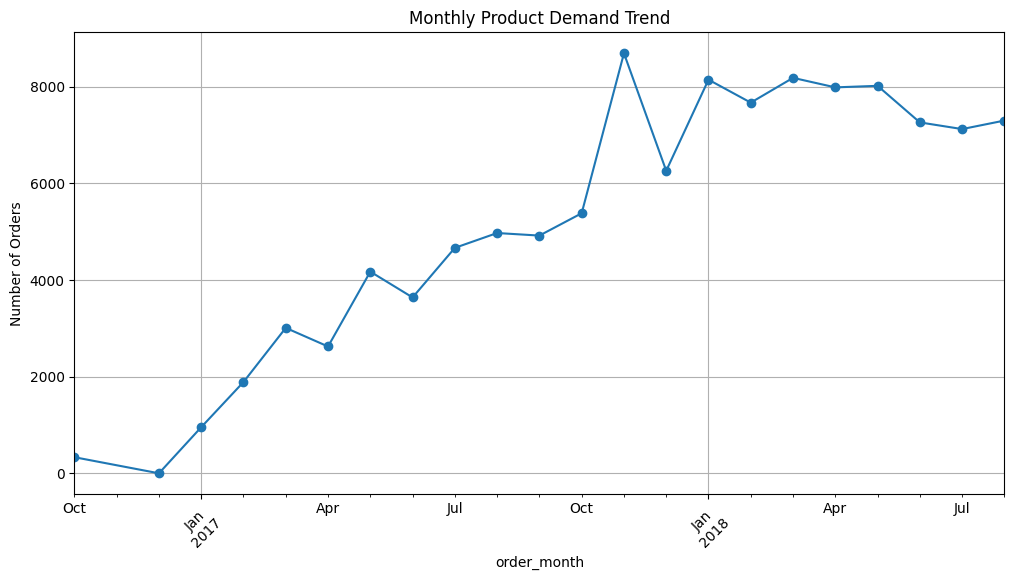

In [168]:
# Create 'order_month' column
new_df['order_month'] = new_df['order_purchase_timestamp'].dt.to_period('M')

# Monthly demand trend
monthly_demand = new_df.groupby('order_month').size()
monthly_demand.plot(figsize=(12,6), marker='o')
plt.title("Monthly Product Demand Trend")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [169]:
new_df.to_csv("olist_cleaned_merged.csv", index=False)